In [1]:
# imports
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd #https://www.dataquest.io/blog/large_files/pandas-cheat-sheet.pdf
import seaborn as sns
import itertools
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
# read input
filename = "data/SmsCollection.csv"

df = pd.DataFrame(columns=['label', 'text'])
with open(filename,'r') as csvfile:
    for line in csvfile:
        if line[:3] == "ham":
            df.loc[df.count().label] = ["ham", line[4:]]
        elif line[:4] == "spam":
            df.loc[df.count().label] = ["spam", line[5:]]
    


In [3]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4827   4518                           Sorry, I'll call later\n   30
spam    747    653  Please call our customer service representativ...    4

In [4]:
df['length'] = df.text.apply(len)

In [5]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

text_feat = df['text'].copy()
text_feat = text_feat.apply(text_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(text_feat)


In [6]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.2, random_state=69)

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [7]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

def predict_labels(clf, features):
    return (clf.predict(features))

In [8]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))
    

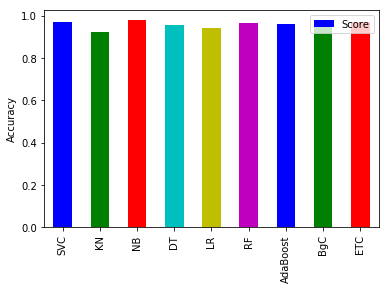

In [9]:
df_scores = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df_scores.plot(kind='bar', color='bgrcym')
plt.ylabel("Accuracy")
plt.show()

In [10]:
# VANAF HIER ANDERE APPROACH

In [11]:
df2 = df.copy()
d={'spam':1,'ham':0}
df2.label = list(map(lambda x:d[x],df2.label))

In [12]:
class stemmed_tfidf():
    def __init__(self,max_features=5000):
        self.ps = PorterStemmer()
        self.vc = TfidfVectorizer(analyzer='word',#{‘word’, ‘char’}  Whether the feature should be made of word or character n-grams
                             stop_words = 'english',
                             max_features = max_features)
    def tfidf(self,ListStr):
        '''
        return: sklearn.feature_extraction.text.TfidfVectorizer
        '''
        table = self.vc.fit_transform([self.stem_string(s) for s in ListStr])
        return table
    def stem_string(self,s):
        '''
        s:str, e.g. s = "Get strings with string. With. Punctuation?"
        ps: stemmer from nltk module
        return: bag of words.e.g. 'get string with string with punctuat'
        '''    
        s = re.sub(r'[^\w\s]',' ',s)# remove punctuation.
        tokens = word_tokenize(s) # list of words.
        #a = [w for w in tokens if not w in stopwords.words('english')]# remove common no meaning words
        return ' '.join([self.ps.stem(w) for w in tokens])# e.g. 'desks'->'desk'

stf = stemmed_tfidf()
feature = stf.tfidf(df2.text) # this will be a sparse matrix of size (n,5000)

In [13]:
Acc = {}
F1score = {}
confusion_mat={}
predictions = {}

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(feature, df2.label, test_size=0.2, random_state=1)

In [15]:
name = 'SVM'
svc = SVC(kernel='sigmoid', C=1.25, gamma=0.825,class_weight='balanced')
svc.fit(Xtrain,ytrain)
pred = svc.predict(Xtest.toarray())
F1score[name]= f1_score(ytest,pred)
Acc[name] = accuracy_score(ytest,pred)
confusion_mat[name] = confusion_matrix(ytest,pred)
predictions[name]=pred
print(name+': Accuracy=%1.3f, F1=%1.3f'%(Acc[name],F1score[name]))

SVM: Accuracy=0.987, F1=0.945


In [16]:
name = 'MNB'
MNB = MultinomialNB(alpha=0.27052632)
MNB.fit(Xtrain,ytrain)
pred = MNB.predict(Xtest.toarray())
F1score[name]= f1_score(ytest,pred)
Acc[name] = accuracy_score(ytest,pred)
confusion_mat[name] = confusion_matrix(ytest,pred)
predictions[name]=pred
print(name+': Accuracy=%1.3f, F1=%1.3f'%(Acc[name],F1score[name]))

MNB: Accuracy=0.991, F1=0.964


In [17]:
name = 'DT'
DT = DecisionTreeClassifier(min_samples_split=4, random_state=1,class_weight='balanced')
DT.fit(Xtrain,ytrain)
pred = DT.predict(Xtest.toarray())
F1score[name]= f1_score(ytest,pred)
Acc[name] = accuracy_score(ytest,pred)
confusion_mat[name] = confusion_matrix(ytest,pred)
predictions[name]=pred
print(name+': Accuracy=%1.3f, F1=%1.3f'%(Acc[name],F1score[name]))

DT: Accuracy=0.967, F1=0.873


In [18]:
name = 'LR'
LR = LogisticRegression(penalty='l2',C=0.863157894737,class_weight='balanced')
LR.fit(Xtrain,ytrain)
pred = LR.predict(Xtest)
F1score[name]= f1_score(ytest,pred)
Acc[name] = accuracy_score(ytest,pred)
confusion_mat[name] = confusion_matrix(ytest,pred)
predictions[name]=pred
print(name+': Accuracy=%1.3f, F1=%1.3f'%(Acc[name],F1score[name]))

LR: Accuracy=0.984, F1=0.935


In [19]:
name = 'RF'
RF = RandomForestClassifier(n_estimators =80,class_weight ='balanced')
RF.fit(Xtrain,ytrain)
pred = RF.predict(Xtest)
F1score[name]= f1_score(ytest,pred)
Acc[name] = accuracy_score(ytest,pred)
confusion_mat[name] = confusion_matrix(ytest,pred)
predictions[name]=pred
print(name+': Accuracy=%1.3f, F1=%1.3f'%(Acc[name],F1score[name]))

RF: Accuracy=0.985, F1=0.935
